# Phishing Site Prediction

## Context:
#### Phishing is a type of semantic attack often used to steal user sensitive information including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, entice a victim into clicking on a link with fiticious URL or opening an attachment in an email or instant message through social messaging services such as WhatsApp, Viber or Facebook Messenger .
#### The data that we have below is representing the URL features and we will be using this to build a model that predicts if a url leads to a Phishing site or not, based on the information provided. 

## Dataset
#### The dataset contains 50 columns including the target column, with 10000 entries each. This is a very large dataset that has alot of information about webistes to help predict if the website is a phishing site or not. This dataset contains 48 features extracted from 5000 phishing webpages and 5000 legitimate webpages.

## Time Line of the Project:
- Data Analysis
- Feature Seection
- Model Building using Random Forest Classifier
- Model Building using XG Boost Regression

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold


%matplotlib inline 

In [8]:
df = pd.read_csv("drive/MyDrive/Phishing.csv")
#df = pd.read_csv("./Phishing.csv")
df.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [9]:
df = df.drop(['id'], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [11]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


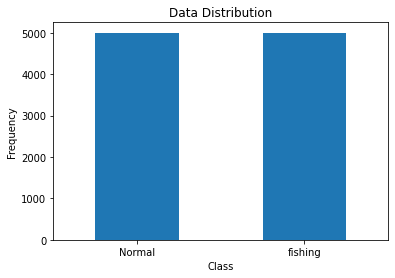

,0
Normal,5000
fishing,5000


In [12]:
# Class label distribution.
fishing_dist = pd.value_counts(df['CLASS_LABEL'], sort = True)
fishing_dist.plot(kind = 'bar', rot=0)
plt.title("Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
## Defining labels to replace 0 and 1 value with 'Normal' and 'fishing', respectively
labels= ['Normal','fishing']
plt.xticks(range(2), labels)
plt.show()
fishing_dist=pd.DataFrame(np.array(fishing_dist), index=labels)
fishing_dist

In [13]:
df['IpAddress'].value_counts()

0    9828
1     172
Name: IpAddress, dtype: int64

### Features selection

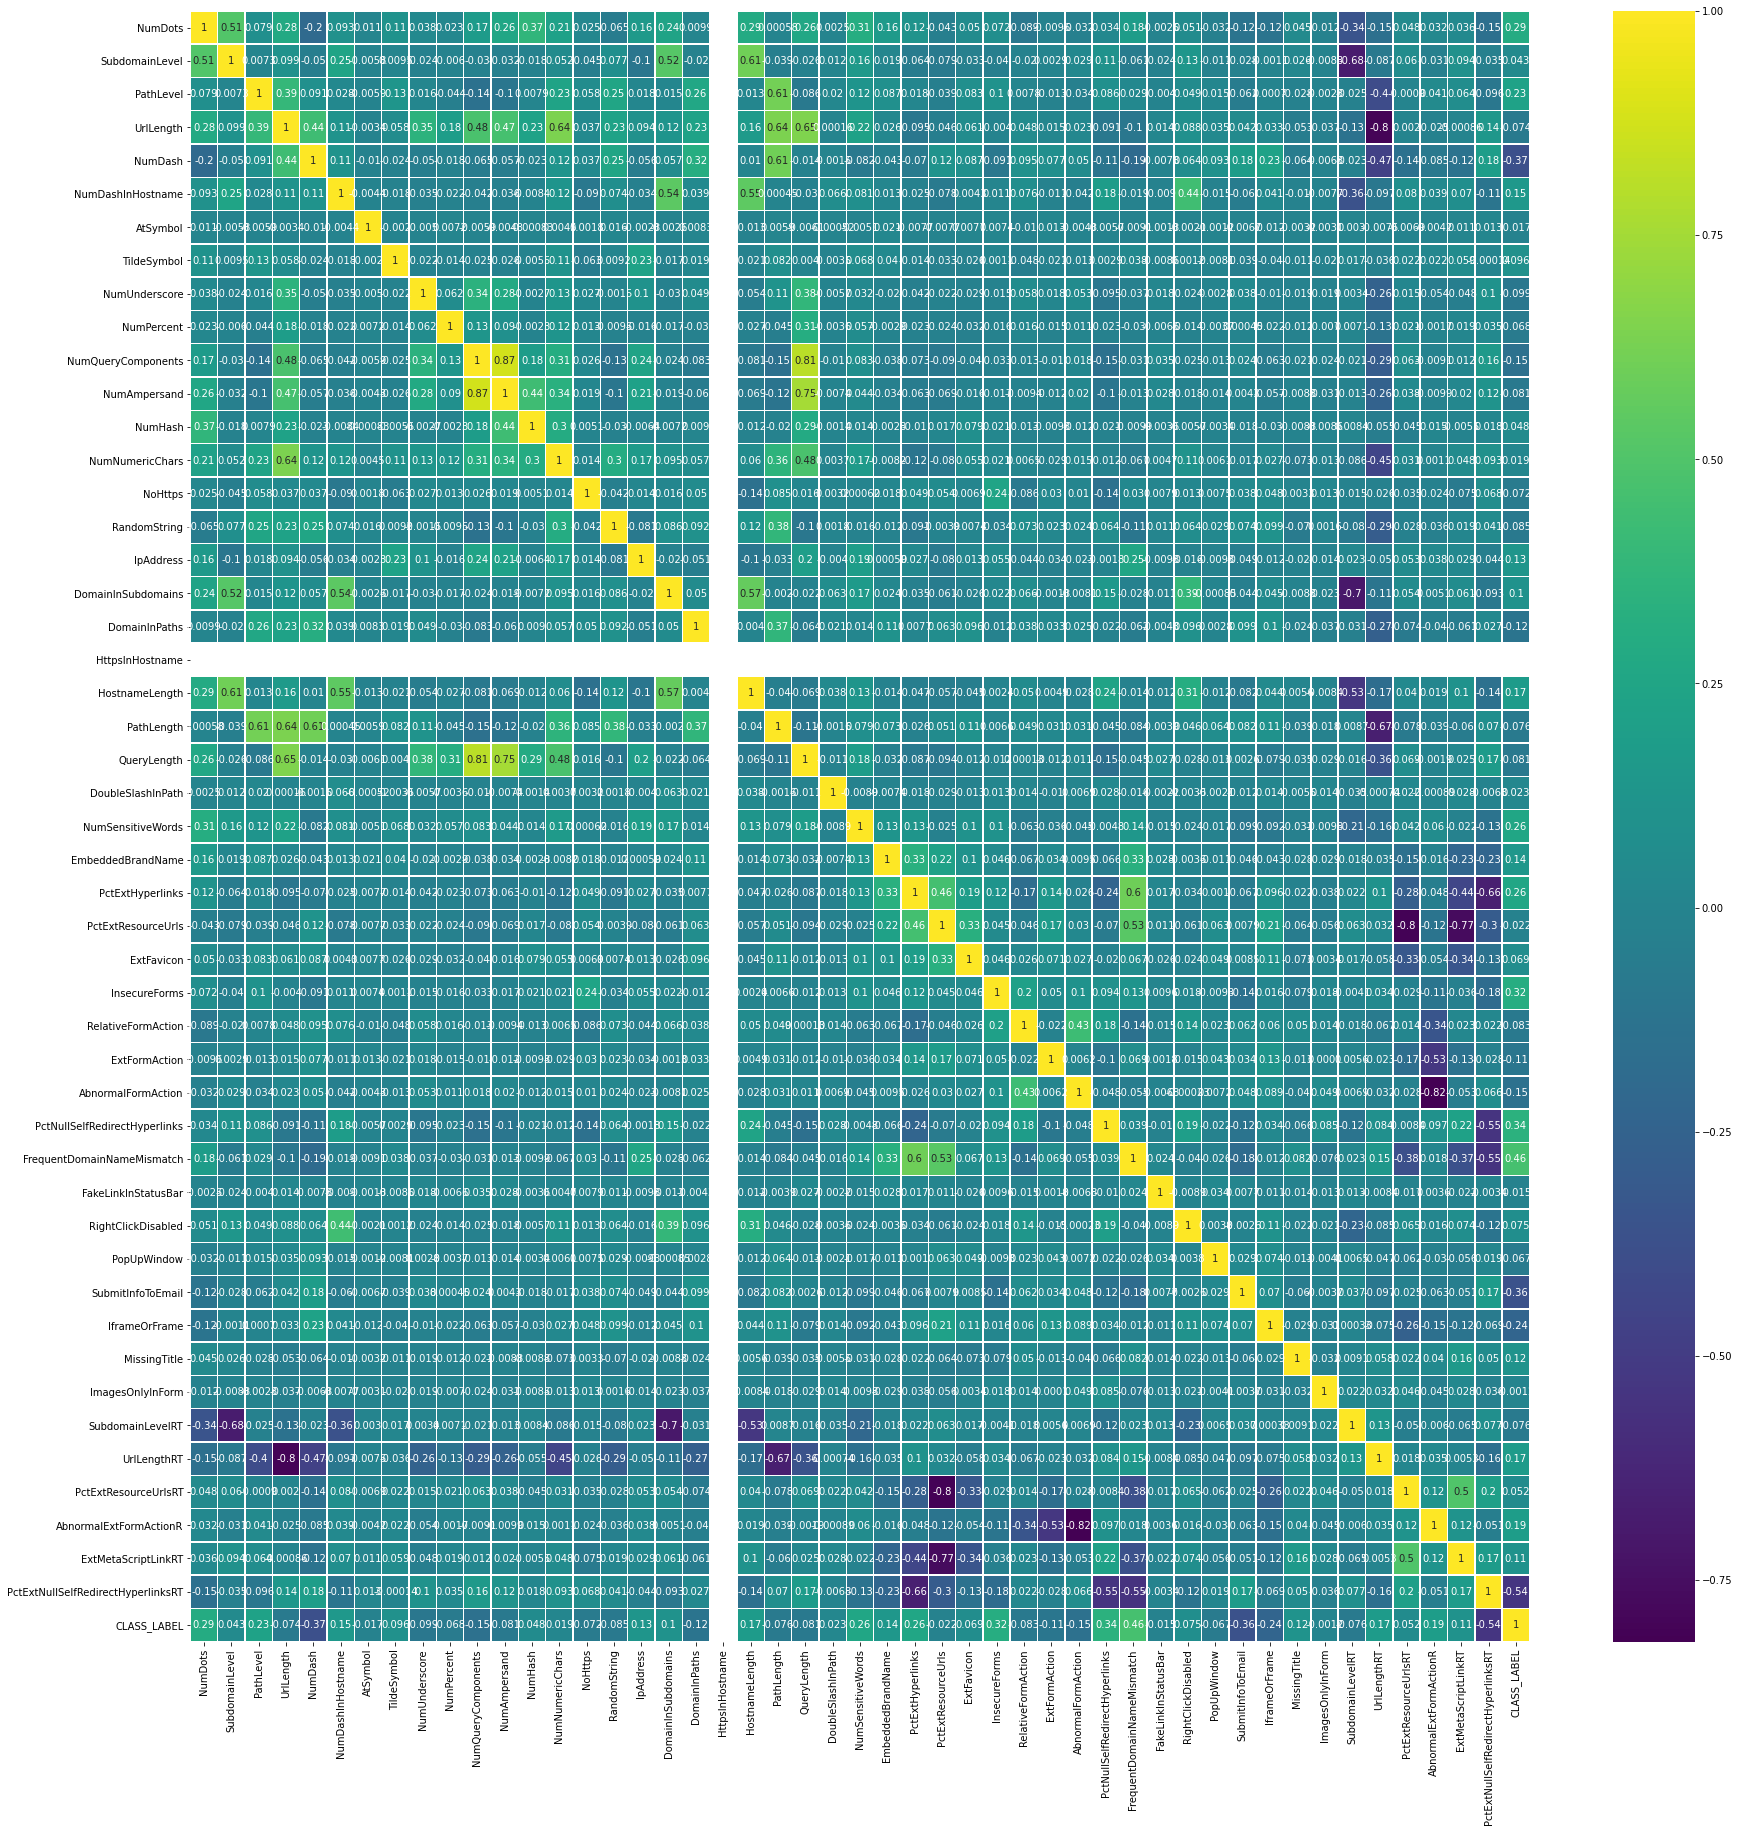

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

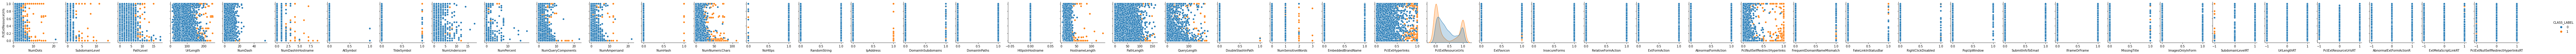

In [21]:
sns.pairplot(df,hue="CLASS_LABEL", y_vars='PctExtResourceUrls')

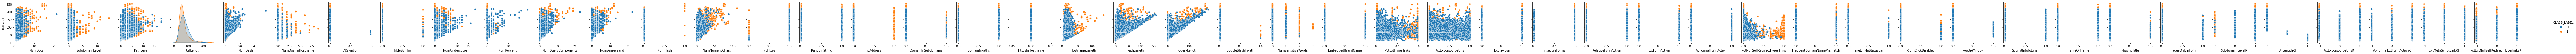

In [22]:
sns.pairplot(df,hue="CLASS_LABEL", y_vars='UrlLength')

### Determining feature relevance using XGBOOST

In [23]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [27]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [30]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[8.07905680e-03 4.44658264e-03 1.43376132e-02 5.44579621e-03
 1.29718723e-02 4.62721931e-03 2.65209902e-04 5.77985305e-04
 3.87015825e-03 2.72689982e-03 9.49571429e-03 4.74535574e-03
 2.06320367e-04 1.62529713e-02 9.18991592e-03 3.50660275e-03
 7.74066060e-04 1.67133630e-03 2.90656293e-03 0.00000000e+00
 3.76962044e-03 5.60940139e-03 6.14148371e-03 3.68979980e-04
 1.58181597e-02 1.11661945e-03 1.36816572e-01 7.92491263e-02
 1.55128298e-02 4.60138005e-02 4.29297415e-03 3.43298808e-03
 1.05678769e-03 2.77906992e-02 1.37921104e-01 5.90926225e-05
 3.00409444e-04 4.89863139e-04 2.92663579e-02 3.53247944e-02
 1.69693528e-03 1.27392236e-03 7.43682526e-04 3.09616315e-03
 8.09052568e-03 4.54316330e-03 6.89216215e-02 2.55185084e-01]


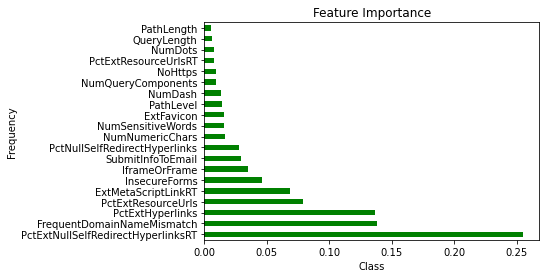

In [44]:
df2=df
df2 = df2.pop('CLASS_LABEL')
index = df2.columns
feat_importances = pd.Series(model.feature_importances_, index=index)
feat_importances.nlargest(20).plot(kind='barh',color='green')
plt.title("Feature Importance")
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

In [14]:
#Model 1
subset_fishing1 = df[['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame', 'CLASS_LABEL']]

subset_fishing1.head()       

,NumDots,PathLevel,NumDash,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,CLASS_LABEL
0,3,5,0,0,0.000,0.250000,1,0.0,0,0,0,1
1,3,3,0,1,0.000,0.000000,1,0.0,0,0,0,1
2,3,2,0,0,0.375,1.000000,1,0.0,0,0,0,1
3,3,6,1,0,1.000,0.095238,1,0.0,1,1,0,1
4,3,4,0,0,1.000,1.000000,0,0.0,1,0,1,1


In [15]:
#Model 2
subset_fishing2 = df[['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame', 'PctExtNullSelfRedirectHyperlinksRT', 'ExtMetaScriptLinkRT', 
       'NumNumericChars', 'ExtFavicon', 'CLASS_LABEL']]

subset_fishing2.head()       

,NumDots,PathLevel,NumDash,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,PctExtNullSelfRedirectHyperlinksRT,ExtMetaScriptLinkRT,NumNumericChars,ExtFavicon,CLASS_LABEL
0,3,5,0,0,0.000,0.250000,1,0.0,0,0,0,1,-1,0,1,1
1,3,3,0,1,0.000,0.000000,1,0.0,0,0,0,1,1,41,0,1
2,3,2,0,0,0.375,1.000000,1,0.0,0,0,0,0,-1,0,1,1
3,3,6,1,0,1.000,0.095238,1,0.0,1,1,0,-1,1,0,1,1
4,3,4,0,0,1.000,1.000000,0,0.0,1,0,1,-1,-1,2,0,1


### Using Random Forest Classifier

#### Using Model 1

In [16]:
y = subset_fishing1['CLASS_LABEL']
X = subset_fishing1.drop(['CLASS_LABEL'], axis = 1)

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [18]:
random_model = RandomForestClassifier(n_estimators=250, n_jobs = -1)

In [19]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.81 %


In [20]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.85 %


#### Using Model 2

In [21]:
y = subset_fishing2['CLASS_LABEL']
X = subset_fishing2.drop(['CLASS_LABEL'], axis = 1)

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
random_model2 = RandomForestClassifier(n_estimators=250, n_jobs = -1)

In [31]:
#Fit
random_model2.fit(Xtrain, ytrain)

y_pred = random_model2.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model2.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.98 %


In [32]:
random_model_accuracy1 = round(random_model2.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

98.2 %


In [33]:
random_model2

RandomForestClassifier(n_estimators=250, n_jobs=-1)

### Using XG Boost Regression Model
Lets consider hyper parameter tunning with XGBoost

In [35]:
xg= XGBRegressor()

In [39]:
# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.01','0.05', '0.1','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500]
['0.01', '0.05', '0.1', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


In [40]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': ['0.01', '0.05', '0.1', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [41]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
xgb_random.fit(Xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[08:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   3.0s
[08:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   3.0s
[08:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   2.9s
[08:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': '0.05'}

### Fitting our Model with best  Params

In [50]:
xgr = XGBRegressor(subsample= 0.7,
 n_estimators= 200,
 min_child_weight= 3,
 max_depth= 10,
 learning_rate= 0.05)

In [51]:
xgr.fit(Xtrain,ytrain)

[09:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=10, min_child_weight=3,
             n_estimators=200, subsample=0.7)

### Predictions and Accuracy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


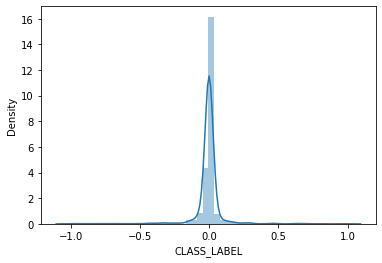

In [52]:
predictions=xgr.predict(Xtest)
sns.distplot(ytest-predictions)

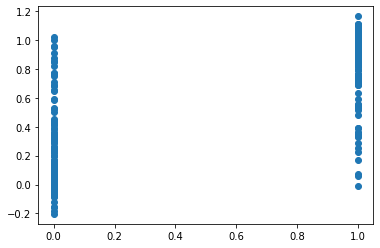

In [53]:
plt.scatter(ytest,predictions)

In [54]:
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))
print("r2_score is",r2_score(ytest, predictions))

MAE: 0.039908696815371514
MSE: 0.01524730216899614
RMSE: 0.12347996667069579
r2_score is 0.9390020076131117


#### Additional features in the model2 was reponsible for the <1% increase in accuracy. However, having to increase the number of required variables in an app could make it overwhelming, so we'll be using model 1 with its current accuracy.

In [67]:
# Save the trained model as a pickle string.

saved_model = pickle.dump(random_model, open('drive/MyDrive/Phishing.pickle','wb'))
#saved_model = pickle.dump(random_model, open('./Phishing.pickle','wb'))

## Result Summary
#### We just received a validation accuray of  99.98% and a 99.8% test accuracy with RandomForestClassifier using model 2. The XGBoost Classifier has lowest model performance of 93.9%. However, we'll be moving forward with RandomForestClassifier model1, which is saved to the file *'Phishing.pickle'*

## Next Steps
#### Next in this project, a django app is developed and deployed in Heroku with code contribution from *https://www.udemy.com/user/pianalytix/*


### Data Source
##### https://www.udemy.com/user/pianalytix/